# CSE5311: Numerical Methods for Data Analytics
## Homework 2
### Numerical Optimization

The goal of this assignment is to implement a basic gradient descent algorithm from scratch to optimize the following cost function:
$$\min_x f(x) = (x_1 - 2)^2 + (x_2 - 2)^2$$
where $x = (x_1,x_2)$.  When you visualize the cost function, plot it on the range $x_1\in[-1, 6]$ and $x_2\in[-1, 6]$ .  We are only going to do unconstrained optimization.  The ranges I provided here are just to limit the plotting domain.

In [2]:
# Import any libraries you may need.

# Tip: If you turn on the pretty print and then want to turn it off use:  sympy.init_printing(pretty_print=False)
import sympy 
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sympy.init_printing()

In [3]:
# We will use symbolic module to define two variables and the cost function.
x1, x2 = sympy.symbols("x_1, x_2")
cost_func = (x1 - 2)**2 + (x2 - 2)**2

In [4]:
# Use symbolic evaluation to get our gradient
costFunc_prime = [cost_func.diff(x_) for x_ in (x1, x2)]


In [5]:
# Display the gradient
cost_funcPrime = sympy.Matrix(costFunc_prime)
print('This is array for the gradient of cost function: \n', cost_funcPrime)

This is array for the gradient of cost function: 
 Matrix([[2*x_1 - 4], [2*x_2 - 4]])


In [6]:
# Use symbolic evaluation to get our Hessian
costFunc_Hess = [[cost_func.diff(x1_, x2_) for x1_ in (x1, x2) for x2_ in (x1, x2) ]]

In [7]:
# Display the Hessian
cost_funcDhessian = sympy.Matrix(costFunc_Hess)
print('This is Hessian for the cost function: ', cost_funcDhessian)

# Change the matrix to a numpy array.
costHessian = np.array(cost_funcDhessian)
costHessian = np.reshape(costHessian, (2,2))
print('This is the Hessian matrix for the cost function: \n', costHessian)

This is Hessian for the cost function:  Matrix([[2, 0, 0, 2]])
This is the Hessian matrix for the cost function: 
 [[2 0]
 [0 2]]


In [8]:
# Transforms sympy expressions for the cost, gradient, and hessian to lambda functions which can be used to calculate numerical 
# values very fast.
costLambda = sympy.lambdify((x1, x2), cost_func, 'numpy')
costPrimeLambda = sympy.lambdify((x1, x2), costFunc_prime, 'numpy')
costHessianLambda = sympy.lambdify((x1, x2), costFunc_Hess, 'numpy')




In [9]:
# Write a wrapper function that lets you pass a single array as the argument
# instead of one argument for each variable.
def func_X1X2(f):
    """
    Wrapper for f(X) --> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))

In [10]:
# Create the vectorized version of functions for the cost and the gradient.
f = func_X1X2(costLambda)
fPrime = func_X1X2(costPrimeLambda)
fHessian = func_X1X2(costHessianLambda)


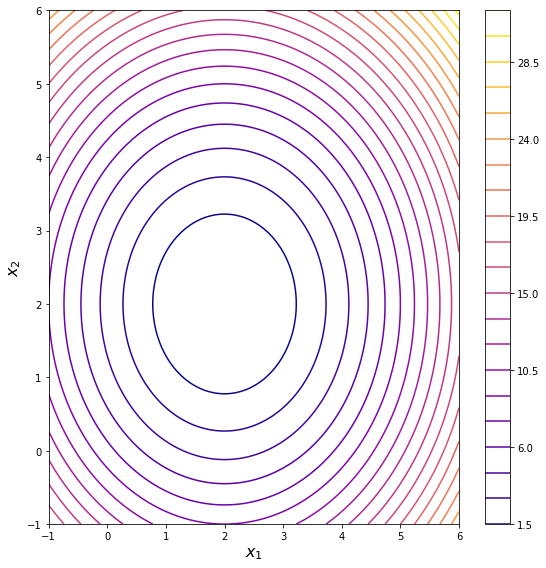

In [11]:
# Visualize the contour plot of the cost function in the range indicated at top of the HW.  Put about a 100 points 
# in each direciton.  You should be able to visually see where the minimum.

# Create evenly spaced points for x_1 and x_2
a = b = np.linspace(-1, 6, 100)

fig, ax = plt.subplots(figsize=(8, 8))
XX, YY = np.meshgrid(a, b)
c = ax.contour(XX, YY, costLambda(XX, YY), 25, cmap=plt.cm.plasma)

ax.set_xlabel(r"$x_1$", fontsize=16)
ax.set_ylabel(r"$x_2$", fontsize=16)
plt.colorbar(c, ax=ax)
fig.tight_layout()
fig.savefig('HW-002_Function_contour_plot.pdf')


In [11]:
# Intialize a starting location for your gradient descent search to x = [5,5]
# I believe this is not a good idea to have the starting condition in a different cell to the one doing the gradient descent. 
# I have encountered problems with inconsistent values for the optimal x values for the objective function.
# I would have to reintialize this cell everytime before the gradient descent.

Write code that starts at the desired starting point and performs gradient descent update to reach the optimal $x$ value for the objective function $f(x)$.  For each iteration of your gradient descent update, plot the new location on the contour plot of your objective function.  When your program finishes executing you should have a trail of dots starting from your initial point to your final soluiton.  Extra points will be given to those that implement both gradient descent and Newton's method udpates.  Some hints:
* Follow the pseudo code shell we outline in class
* To make the plot appear as as separate window (instead of embedded in your notebook) simply call %matplotlib  (notice no 'inline') in the cell
* Make sure you have good stopping conditions for your loop.  I recommend having at least an iteration counter to stop if a maximum number of iterations are reached, and also, something that checks the size of norm of the gradient.
* You should have probably less than 20 lines of code.  If you have a ton more, may want to think about the structure of your code, or if you really understand the gradient descent method.

Using matplotlib backend: Qt5Agg
0 iterations, cost: 18.0, gradient: 8.48528137423857 
1 iterations, cost: 11.520000000000003, gradient: 6.788225099390857 
2 iterations, cost: 7.3728000000000025, gradient: 5.430580079512686 
3 iterations, cost: 4.718592000000003, gradient: 4.3444640636101495 
4 iterations, cost: 3.0198988800000026, gradient: 3.47557125088812 
5 iterations, cost: 1.9327352832000013, gradient: 2.780457000710496 
6 iterations, cost: 1.2369505812480015, gradient: 2.224365600568397 
7 iterations, cost: 0.7916483719987205, gradient: 1.7794924804547172 
8 iterations, cost: 0.5066549580791809, gradient: 1.4235939843637735 
9 iterations, cost: 0.3242591731706758, gradient: 1.1388751874910188 
10 iterations, cost: 0.20752587082923274, gradient: 0.9111001499928155 
11 iterations, cost: 0.13281655733070877, gradient: 0.728880119994252 
12 iterations, cost: 0.08500259669165376, gradient: 0.583104095995402 
13 iterations, cost: 0.05440166188265829, gradient: 0.4664832767963211 
14 i

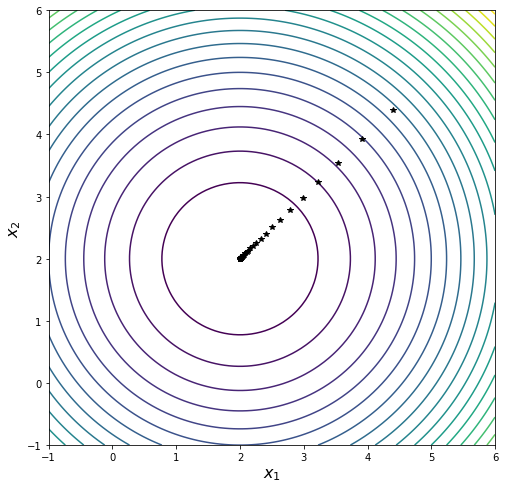

In [12]:
# Gradient descent code
# Since the point intialize from the previous cell, we just need the learning rate which would be alpha < 1
%matplotlib

# Intialize the variables for gradient descent and contour plot.
alpha = 0.1
x_start = np.array([5,5], dtype=np.float)          
num_points = int(len(XX))*10

fig1, ax1 = plt.subplots(figsize=(8,8))
c1 = ax1.contour(XX, YY, costLambda(XX, YY), 25)

for i in range(0, num_points):
    cost = (x_start[0] - 2)**2 + (x_start[1] - 2)**2
    gradient = (2.0 * x_start) - np.array([4.0,4.0])
    # Checking the norm and cost to see a decrease (debugging to see if the Gradient Descent is working.)
    print('{} iterations, cost: {}, gradient: {} '.format(i, cost, np.linalg.norm(gradient))) 
    
    x_start = x_start - (alpha * gradient) # Update function.
    plt.plot(x_start[0], x_start[1], 'k*') # Plot the new x on the contour plot.
    if np.linalg.norm(gradient) < 1e-4:    # Break condition if it reaches a desirable precision before max number of iterations.
        break

ax1.set_xlabel(r"$x_1$", fontsize = 16)
ax1.set_ylabel(r"$x_2$", fontsize = 16)

# fig1.colorbar(c1, ax1=ax1, orientation='vertical')

plt.show()


# print('The local minimum occurs for GD at : \n', x_start)



In [13]:
# Initialize the variables 
x_start2 = np.array([5,5], dtype=np.float)          
ee = 1
H = np.array([[2, 0], [0, 2]])
precision = 1e-4

# Newton's Method: X_n+1 = x_n - ([H]^-1*J(F)) where J(F) is the Jacobian of the function.
for j in range(0, num_points):
    cost2 = (x_start2[0] - 2)**2 + (x_start2[1] - 2)**2
    gradient2 = (2.0 * x_start2) - np.array([4.0,4.0])
    invH = np.linalg.inv(H) # Calculating the inverse is the most costly part of this algorithm.
    
    # Debugging.
    print('Iteration count: {}, gradientNorm: {}, Cost: {}'.format(j, np.linalg.norm(gradient2), cost2))
    
    x_start2 = x_start2 - ee * np.dot(invH, gradient2)
    if np.linalg.norm(gradient2) < precision: # If the norm of the gradient sastifies the condition, execute the following command.
        break
    
print('The local minimum occurs for Newton Method at : \n', x_start2)

Iteration count: 0, gradientNorm: 8.48528137423857, Cost: 18.0
Iteration count: 1, gradientNorm: 0.0, Cost: 0.0
The local minimum occurs for Newton Method at : 
 [ 2.  2.]


In [14]:
# Comparision of the Gradient Descent Method and Newton's method.
# Gradient descent method.
print('The local minimum occurs for GD at : \n', x_start)
print('{} iterations, cost: {}, gradient: {} '.format(i, cost, np.linalg.norm(gradient)))
print('\n')

# Newton's Method. 
print('The local minimum occurs for Newton Method at : \n', x_start2)
print('Iteration count: {}, gradientNorm: {}, Cost: {}'.format(j, np.linalg.norm(gradient2), cost2))

The local minimum occurs for GD at : 
 [ 2.0000274  2.0000274]
51 iterations, cost: 2.3466654447719178e-09, gradient: 9.688478610745688e-05 


The local minimum occurs for Newton Method at : 
 [ 2.  2.]
Iteration count: 1, gradientNorm: 0.0, Cost: 0.0


In [15]:
# Alternative gradient descent method calling a function and using the lambda functions within this HW.
#Initialize the variables.
x_begin = np.array([5, 5], dtype=np.float)  
alpha_step =0.1
condition_precise = 0.00001
Num_iter = 500

def GD(A, sigma, Precision, iterations):
    """
    This is a simple gradient descent function which uses other functions from previous cells in this notebook. 
    It is not a very general function so not compatible with every problem.
    Inputs:  A - Starting vector for the gradient descent (must be an array of same size as gradient.)
             Sigma - This is the learning rate of the GD which is less than 1.
             Precision - This will be the acceptable condition of accuracy for the stopping the GD.
             iterations - This is the max number of iterations that the function will run for.
    
    Output:  A - The minimum point reached through Gradient Descent.  
    """
    for k in range(0, iterations):        
        costGD = costLambda(A[0], A[1]) # Using the lambda function to call the cost function.
        gradientGD = costPrimeLambda(A[0], A[1]) # Using the lambda function to call the gradient function.
        gradientGD = np.array(gradientGD, dtype=np.float) # To avoid a list problem that occured when debugging.
        
        # Using the print function for debugging the Gradient Descent.
        print('Iteration count: {}, Cost of Function: {}, Gradnorm: {}'.format(k, costGD, np.linalg.norm(gradientGD)))
        
        # Update function for gradient descent.
        A = A - (sigma * gradientGD)
        
        # Stopping condition when it reaches acceptable precision.
        if np.linalg.norm(gradientGD) < Precision:
            break
    
    return print('The local minimum of gradient descent occurs at: \n', A)
    
GD(x_begin, alpha_step, condition_precise, Num_iter)
#print('The local minimum of gradient descent occurs at:\n', x_begin)

Iteration count: 0, Cost of Function: 18.0, Gradnorm: 8.48528137423857
Iteration count: 1, Cost of Function: 11.520000000000003, Gradnorm: 6.788225099390857
Iteration count: 2, Cost of Function: 7.3728000000000025, Gradnorm: 5.430580079512686
Iteration count: 3, Cost of Function: 4.718592000000003, Gradnorm: 4.3444640636101495
Iteration count: 4, Cost of Function: 3.0198988800000026, Gradnorm: 3.47557125088812
Iteration count: 5, Cost of Function: 1.9327352832000013, Gradnorm: 2.780457000710496
Iteration count: 6, Cost of Function: 1.2369505812480015, Gradnorm: 2.224365600568397
Iteration count: 7, Cost of Function: 0.7916483719987205, Gradnorm: 1.7794924804547172
Iteration count: 8, Cost of Function: 0.5066549580791809, Gradnorm: 1.4235939843637735
Iteration count: 9, Cost of Function: 0.3242591731706758, Gradnorm: 1.1388751874910188
Iteration count: 10, Cost of Function: 0.20752587082923274, Gradnorm: 0.9111001499928155
Iteration count: 11, Cost of Function: 0.13281655733070877, Grad